## Imports

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Helper Functions

### Plotting functions

In [20]:
def add_plot_details(xlabel, ylabel, title):
    """this function added the labels and title for a plot

    Args:
        xlabel (str): label for the x-axis
        ylabel (str): label for the y-axis
        title (str): title for the plot
    """    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [32]:
def plot_line_graph(data, label):
    """Plots a line graph with the corresponding data and label

    Args:
        data (DataFrame): data required for plotting line graph
        label (str): label corresponding to line graph
    """    
    plt.plot(data, ".-", label=label)
    plt.legend(loc="upper left", ncol=3)
    plt.xticks(data.index, rotation=50)

In [22]:
def plot_pie_chart(data, labels, title):
    """Plots pie chart based on necessary data 

    Args:
        data (array): Series to be plotted
        labels (array): label corresponding to pie chart data
        title (str): title for the plot
    """    
    plt.figure(figsize=(8, 6))
    colors = ["#ee82ee", "#7fffd4", "#ff6666", "#ffcc99", "#99ff99", "#66b3ff"]
    plt.pie(
        data,
        labels=labels,
        autopct="%1.1f%%",
        startangle=10,
        pctdistance=0.5,
        explode=[0.05] * len(labels),
        colors=colors,
    )
    # draw inner circle
    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title)
    plt.show()

In [23]:
def plot_multi_bar_chart(
    x,
    height1,
    height2, 
    x_label, 
    height1_label, 
    height2_label,
    title
):
    """Plot a bar chart with multi columnd data and secondary y-axis

    Args:
        x (array): the data corresponding to x-axis
        height1 (array): data to be plotted against first y-axis
        height2 (array): data to be plotted against second y-axis
        x_label (str): label regarding x_axis
        height1_label (str): label regarding first y_axis
        height2_label (str): label regarding second y_axis
        title (str): title for the plot
    """    
    fig, ax = plt.subplots(figsize=(16, 6))
    ax2 = ax.twinx()
    x_axis = np.arange(len(x))
    p1 = ax.bar(
                x_axis,
                height1, 
                width=0.4, 
                label=height1_label, 
                color=["#66b3ff"]
                )
    p2 = ax2.bar(
                x_axis + 0.20 * 2, 
                height2, 
                width=0.4, 
                label=height2_label, 
                color=["#ff6666"]
                )
    ax.set_xticks(x_axis)
    ax.set_xticklabels(x, rotation=60)
    ax.set_xlabel(x_label, size=12)
    ax.set_ylabel(height1_label, size=12)
    ax2.set_ylabel(height2_label, size=12)
    ax.legend(handles=[p1, p2], loc="best")
    ax.set_title(title, fontsize=18)

### Individual Visualization related functions

#### Visualization 1: Multi line plot

In [34]:
def plot_garlic_production(data):
    """Plot (line graph) the Production trends for
    garlic crop across 4 states in India

    Args:
        data (DataFrame): data to be plotted
    """    
    # Defining states of interest for plotting
    states = ["Gujarat", "Madhya Pradesh", "Rajasthan", "Kerala"]
    
    # Filtering data related to Garlic crop
    crop_data = data[data["Crop"] == "Garlic"]
    
    # Grouping data based on state and crop year to get
    # the mean production per state per year
    state_wise_graph = (crop_data
                        .groupby(by=["State", "Crop_Year"])["Production"]
                        .mean())
    
    # Plotting independent line graphs per state
    plt.figure(figsize=(10, 6))
    for state in states:
        data = state_wise_graph.xs(state, level="State")
        plot_line_graph(data, state)
    add_plot_details(
        "Years",
        "Production of crop (tonnes)",
        f"Production of garlic in different states",
    )

#### Visualization 2 : Pie Chart

In [26]:
def plot_top_5_crops_per_state(data, state_name):
    """Plot top crops per state for the year 2012

    Args:
        data (DataFrame): data to be plotted
        state_name (str): state for which the details are filtered
    """       
    
    # Filtering data for the year 2012
    one_year_data = data[data["Crop_Year"] == 2012]
    
    # Filtering data based on individual state
    one_year_state_data = one_year_data[one_year_data["State"] == state_name]
    
    # Grouping the data based on crop to obtain mean production
    one_year_state_data = (
        one_year_state_data.groupby("Crop")
        .mean()
        .sort_values("Production", ascending=False)
    )

    one_year_state_data = one_year_state_data.reset_index()
    
    # Dropping stale columns
    one_year_state_data = one_year_state_data.drop(
        columns=["Crop_Year", "Area ", "Yield"]
    )

    # Obtaining the top 5 crops and labelling rest as others
    top_5 = one_year_state_data[:5].copy()
    new_row = pd.DataFrame(
        data={
            "Crop": ["others"],
            "Production": [one_year_state_data["Production"][5:].sum()],
        }
    )
    pie_data = pd.concat([top_5, new_row])

    # Plotting pie charts per state
    plot_pie_chart(
        pie_data["Production"],
        pie_data["Crop"],
        f"Top crops in {state_name}"
    )
    
def plot_top_northeast_crops(data):
    """Plotting (pie chart) the crops distribution in the north eastern states in India

    Args:
        data (DataFrame): data to be plotted
    """       
    north_east_states = ["Manipur", "Nagaland", "Arunachal Pradesh", "Bihar"]
    for state in north_east_states:
        plot_top_5_crops_per_state(data, state)

#### Visualization 3: Multi Bar Chart

In [25]:
def plot_tobbacco_plantation_area_details(data):
    """Plot (bar chart) the states which have tobbaco plantation along
    with the area as well as production details for the year 2015

    Args:
        data (DataFrame): data to be plotted
    """    
    # Fetching data related to year 2015
    one_year_data = data[data["Crop_Year"] == 2015]
    
    #Fetching the data related to Tobacco crop
    one_year_tobacco_data = one_year_data[one_year_data["Crop"] == "Tobacco"]
    
    # Fetching the state names
    tobacco_states = set(one_year_tobacco_data.State)
    
    # dropping columns not required for plotting
    one_year_tobacco_data = one_year_tobacco_data.drop(
        columns=["District ", "Season", "Crop", "Crop_Year"]
    )
    
    # Grouping the data by state to obtain mean value from all districts
    one_year_tobacco_data = (
        one_year_tobacco_data.groupby("State")
        .mean()
        .sort_values("Area ", ascending=False)
    )
    
    one_year_tobacco_data = one_year_tobacco_data.reset_index()
    
    # Plotting multibar chart for production and area of plantation
    plot_multi_bar_chart(
        tobacco_states,
        one_year_tobacco_data["Area "],
        one_year_tobacco_data["Production"],
        "Tobacco producing states",
        "Area of plantation (hectares)",
        "Production of crop (tonnes)",
        "Area and Production of Tobacco plantantion in different states",
    )

## Data Processing

### Data Loading

In [27]:
# Loading the data file (csv format) using pandas
crop_data = pd.read_csv("APY.csv")

### Data Exploration data

In [28]:
# Viewing the data sample
crop_data.tail()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54
345335,West Bengal,PURULIA,Wheat,2019,Rabi,516.0,931.0,1.80


In [29]:
# List of states whose data is available
states = crop_data.State.unique()
states

array(['Andaman and Nicobar Island', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'CHANDIGARH',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Laddak',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'THE DADRA AND NAGAR HAVELI',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [30]:
# List of crops whose data is available
crops = crop_data.Crop.unique()
crops

array(['Arecanut', 'Arhar/Tur', 'Banana', 'Black pepper', 'Cashewnut',
       'Coconut ', 'Cowpea(Lobia)', 'Dry chillies', 'Ginger', 'Groundnut',
       'Maize', 'Moong(Green Gram)', 'Oilseeds total',
       'Other Kharif pulses', 'other oilseeds', 'Rapeseed &Mustard',
       'Rice', 'Sesamum', 'Sugarcane', 'Sunflower', 'Sweet potato',
       'Tapioca', 'Turmeric', 'Urad', 'Bajra', 'Castor seed', 'Coriander',
       'Cotton(lint)', 'Garlic', 'Gram', 'Guar seed', 'Horse-gram',
       'Jowar', 'Linseed', 'Masoor', 'Mesta', 'Niger seed', 'Onion',
       'Other  Rabi pulses', 'Potato', 'Ragi', 'Safflower', 'Sannhamp',
       'Small millets', 'Soyabean', 'Tobacco', 'Wheat',
       'Peas & beans (Pulses)', 'Jute', 'Barley', 'Khesari', 'Moth',
       'Other Cereals', 'Cardamom', 'Other Summer Pulses', nan],
      dtype=object)

## Visualizing the data

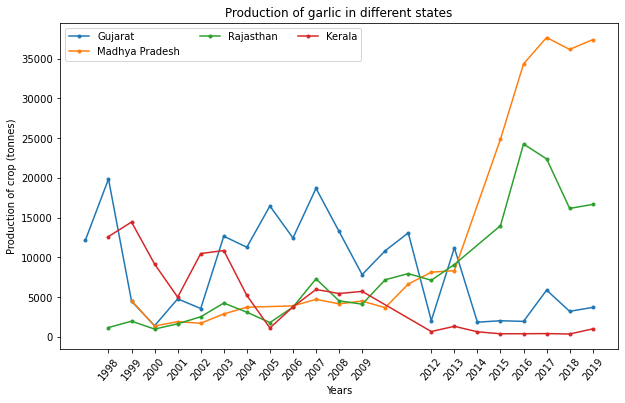

In [40]:
# Plotting Garlic crop plantation details over years for different states
plot_garlic_production(crop_data)

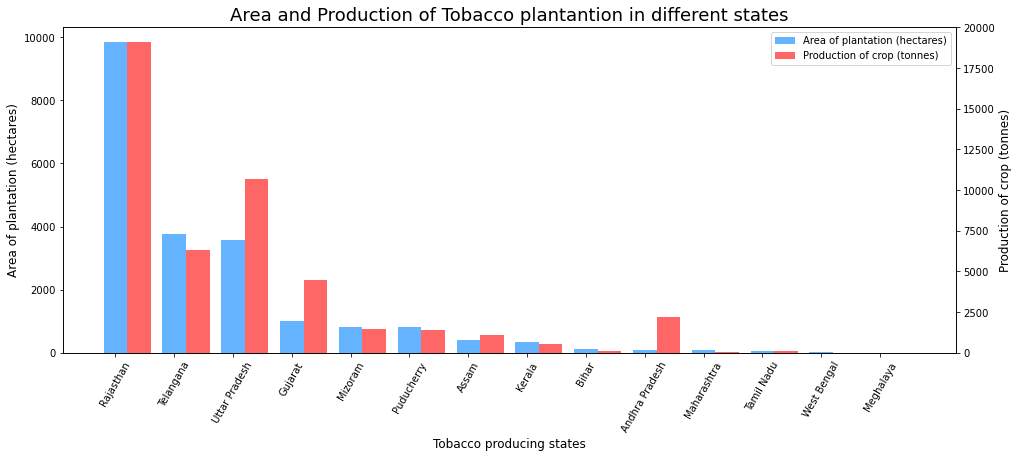

In [41]:
# Plotting the area of plantation and production details for states growing tobacco crop in the country
plot_tobbacco_plantation_area_details(crop_data)

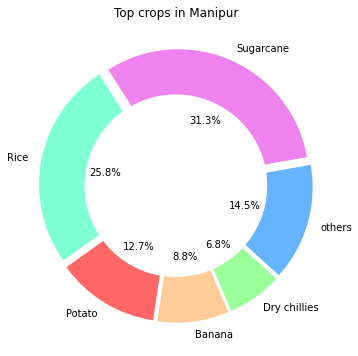

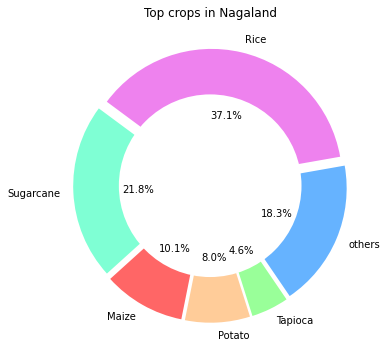

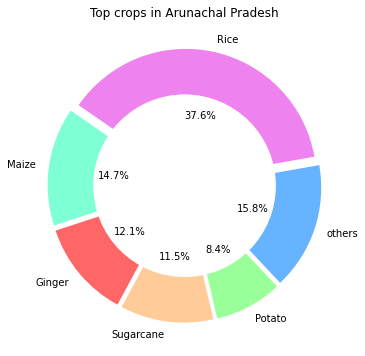

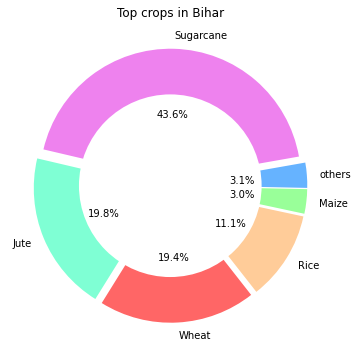

In [42]:
# Plotting the crops distribution for north east states
plot_top_northeast_crops(crop_data)

### Data Reference

https://www.kaggle.com/datasets/nikhilmahajan29/crop-production-statistics-india